***This notebook will follow along with the 2nd chapter of the Hands on ML book by Aurelien Geron. It will also include other materials that are related and comes along the way but the chapter will be the primary resource.***

**Table of contents**<a id='toc0_'></a>    
- [Look at the bigger picture and Frame the problem](#toc1_)    
    - [*Machine learning problem - Narrow it down*](#toc1_1_1_)    
    - [*The problem definition framework*](#toc1_1_2_)    
    - [*Evaluation of success*](#toc1_1_3_)    
    - [*Verify the assumptions*](#toc1_1_4_)    
    - [*Start designing your system*](#toc1_1_5_)    
- [The task at hand](#toc2_)    
- [Getting the data](#toc3_)    
- [Initial exploration](#toc4_)    
  - [Create a test set](#toc4_1_)    
    - [*Simple random sampling*](#toc4_1_1_)    
    - [*Stratified random sampling*](#toc4_1_2_)    
- [Explore and visualize the data to gain insights](#toc5_)    
  - [Visualizing geographical data](#toc5_1_)    
  - [Look for correlations](#toc5_2_)    
  - [Experimenting with attribute combinations](#toc5_3_)    
- [Data preparation for ML algorithms](#toc6_)    
  - [Feature & Target extraction](#toc6_1_)    
  - [Handling missing values](#toc6_2_)    
    - [*Univariate imputation*](#toc6_2_1_)    
    - [*Multivariate imputation*](#toc6_2_2_)    
    - [*Nearest neighbors imputation*](#toc6_2_3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=5
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_'></a>[Look at the bigger picture and Frame the problem](#toc0_)

#### <a id='toc1_1_1_'></a>[*Machine learning problem - Narrow it down*](#toc0_)

A machine learning problem should be narrowed down to as specific as possible. It's definitely not  a bad thing to describe a machine learning problem generally or making it verbally appealing or having an ambitious problem definition is not bad either, at least to make the general people understand the problem better. But you also have to consider that machines don't understand things the same way we do. 

Sometimes we humans understand something intuitively. But for machines the process of learning is nothing but a well defined algorithm (designed to solve specific kinds of problems) and using it to extract patterns and insights from the data. And that's why it's important to have a clear problem definition that can be divided into specific steps or tasks so that the machine understands what it's doing.

*Read [this note](ML_Basics/Theory/04_Machine_Learning_Problem_(Narrow_it_Down).pdf) on how to narrow down a specific problem - brief explanation with example scenario.*

#### <a id='toc1_1_2_'></a>[*The problem definition framework*](#toc0_)

Once you've narrowed down your broad problem to a somewhat specific problem, that you think machine learning can be used to solve, now it's time to dig deep into the problem and define the problem precisely so that you have a clear idea what is your ultimate goal. The problem definition framework can help you in this regard.

The problem definition framework goes like this:

1. **Is there a pattern?** - The fundamental assumption that underlies all machine learning problems is that there is a pattern. So before you start, ask yourself, do you think there's a pattern. If not, then we are already done.

2. **Informal description** - Describe the problem as though you were describing it to a friend or colleague. This can provide a great starting point for highlighting areas that you might need to fill. It also provides the basis for a one sentence description you can use to share your understanding of the problem.

3. **Why does this problem needs to be solved?**
    - What's the motivation? What need will be fulfilled when the problem is solved? What is it you're out for?
    - What are the benefits of having this problem solved? What capabilities does it enable?
    - How will the solution be used? What type of lifetime you expect the solution to have?

4. **Make assumptions** - Create a list of assumptions about the problem and it’s phrasing. These may be rules of thumb and domain specific information that you think will get you to a viable solution faster. Make sure to verify these assumptions. Wrong assumptions can have devastating effects on the solution.

5. **Understand the problem from the perspective of the user** - You have to have a clear view of your goal. And what better way to know what problem(s) to solve than asking the users themselves what they want. No one knows the problem better than the intended user - the person we are attempting to solve the problem for. This will help you massively to *pinpoint the features that your dataset should be comprised of.*

6. **Subject yourself to the problem** - Explore how you would solve the problem manually. List out step-by-step what data you would collect, how you would prepare it and how you would design a program to solve the problem. 

*Read [this note](ML_Basics/Theory/05_So_How_do_You_Define_a_Machine_Learning_Problem.pdf) on how to define a machine learning problem for a bit more explanation with example scenarios.*

#### <a id='toc1_1_3_'></a>[*Evaluation of success*](#toc0_)

Answer the following 3 questions:

1. **What does success look like?** - What it would look like if your machine learning model answered your questions perfectly. How would you use that information? Would you trust it? Should we, trust it?
2. **How are we already measuring success?** - It is possible to define a new metric to evaluate a process or model's performance. But it's not ideal. A better situation would be, if we had some kind of system already in place to measure against. The aim of using a machine learning model to solve a problem is to increase the efficiency. So it's natural that we would like to know how our model is performing in comparison to the solution already in place (the benchmark).
3. **How are you currently measuring success?/How do you want to measure success?** - ***If you haven't already, select a performance measure.*** Now ask yourself this, Does it measure what you want it to measure? How sure are you that your measurement actually evaluates something you care about. Is there another better way of evaluating that gets you closer to your ultimate goal? Is your choice of proxies optimal?

*Read [this note](ML_Basics/Theory/05_So_How_do_You_Define_a_Machine_Learning_Problem.pdf). It explains the above 3 points a bit more in depth and if you don't know what proxies are you should definitely check it out.*

#### <a id='toc1_1_4_'></a>[*Verify the assumptions*](#toc0_)

List and verify the assumptions that have been made so far (by you or others); this can help you catch serious issues early on.

#### <a id='toc1_1_5_'></a>[*Start designing your system*](#toc0_)

With all this information, you are now ready to start designing your system. First, determine what kind of training supervision the model will need: is it a supervised, unsupervised, semi-supervised, self-supervised, or reinforcement learning task? And is it a classification task, a regression task, or something else? Should you use batch learning or online learning techniques? 

## <a id='toc2_'></a>[The task at hand](#toc0_)

Welcome to the Machine Learning Housing Corporation! Your first task is to use California census data to build a model of housing prices in the state. This data includes metrics such as the population, median income, and median housing price for each block group in California. Block groups are the smallest geographical unit for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). We will call them “districts” for short. 

Your model should learn from this data and be able to predict the median housing price in any district, given all the other metrics.

**Going through the above-mentioned process of framing the problem (in the previous section),** 

- *We've learned the following:*

    1. Our model’s output (a prediction of a district’s median housing price) will be fed to another machine learning system, along with many other signals. This downstream system will determine whether it is worth investing in a given area. Getting this right is critical, as it directly affects revenue.
    2. The district housing prices are currently estimated manually by experts: a team gathers up-to-date information about a district. When they cannot get the median housing price, they estimate it using complex rules. When they can gather the median housing price, often their estimation is off by a large margin (somewhere around 30%).


- *We've made the following assumptions:*

    1. The output of our model is a continuous variable i.e, the predicted median price (in USD).
    2. Our model will be trained only on the available census dataset and won't be having incoming data points.


- *We've verified our assumptions and decided on the following:*

    1. Our model will be a supervised regression model. It will be a *batch learning aka. offline learning* model.
    2. As our performance measure we will be using *Root mean squared error (RMSE)*.


## <a id='toc3_'></a>[Getting the data](#toc0_)

In typical environments your data would be available in a relational database or some other common data store, and spread across multiple tables/documents/files. To access it, you would first need to get your credentials and access authorizations and familiarize yourself with the data schema. 

In this project, however, things are much simpler: we will just download a single compressed file, *"housing.tgz"*, which contains a comma-separated values (CSV) file called *"housing.csv"* with all the data.


Rather than manually downloading and decompressing the data, it’s usually preferable to write a function that does it for you. This is useful in particular if the data changes regularly: you can write a small script that uses the function to fetch the latest data (or you can set up a scheduled job to do that automatically at regular
intervals). Automating the process of fetching the data is also useful if you need to install the dataset on multiple machines.

> To work with paths and directories in Python we can use multiple libraries such as, the os module, pathlib module, glob module etc. We will use the `pathlib` library due to some of its advantages such as, robustness, ease of use, consistency etc. To use the pathlib library, you can import the pathlib module and then create a `Path` object for the path you want to work with. Once you have a Path object, you can use its methods and operators to perform various operations on the path.
>
>> See a quick overview of the pathlib module and its usage [here](https://g.co/bard/share/1b0eda92c474).

In [71]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

In [72]:
def load_housing_data():
    # cwd = Path()
    housing_dataset_path = Path("datasets/housing/housing.csv")
    # if the dataset file doesn't exist then download it
    if not housing_dataset_path.is_file():
        # parents = True : if parent directories doesn't exist create them
        # exist_ok = True : if the directory already exists then don't raise error
        Path("datasets").mkdir(parents=True, exist_ok=True)  # returns None
        datasets_dir_path = Path("datasets")
        tarball_path = datasets_dir_path / "housing.tgz"
        dataset_url = "https://github.com/ageron/data/raw/main/housing.tgz"
        # urllib will be used to download the tarball which is saved as "datasets/housing.tgz"
        urllib.request.urlretrieve(dataset_url, tarball_path)
        # tarfile module is used to extract the contents of the tarball to the datasets_path
        # the file will be extracted as, "datasets/housing/housing.csv"
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path=datasets_dir_path)
    return pd.read_csv(housing_dataset_path)

In [73]:
housing_df = load_housing_data()

## <a id='toc4_'></a>[Initial exploration](#toc0_)

- Get a quick look at the data with `df.head()`

In [74]:
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


- No. of rows and columns

In [75]:
n_obs, n_cols = housing_df.shape
print(f"number of observations: {n_obs}")
print(f"number of columns: {n_cols}")

number of observations: 20640
number of columns: 10


- Get a quick description of the data (total rows, total columns, non-null values in each column, datatypes etc.)

In [76]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- Percentage of missing data

In [77]:
housing_df.isna().mean().mul(100)

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

*About 1% of the "total_bedrooms" data is missing. We can either drop those rows, impute them (filling the nan values with mean/median/mode/other strategy) or, drop the column altogether. We will decide what to do after some more exploration.*

- Only the "ocean_proximity" column is object type, all the other columns are number types. We can explore some basic insights on the number type columns with the `df.describe()` method. For exploring the object type columns, `ser.value_counts()` is a good start.

In [78]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


*Looking at the "min" and "max" values of the "median_income" column we can see that they are definitely not in USD. Contacting the client reveals that, this column have been scaled down by a factor of 10,000 i.e, 3 is actually meant to represent 30,000 USD. A histogram would be a good choice to see if there are any more caveats, for example if the data is clipped or not.*

In [79]:
housing_df.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

- Get a feel about how the numerical variables are distributed

In [80]:
import matplotlib.pyplot as plt

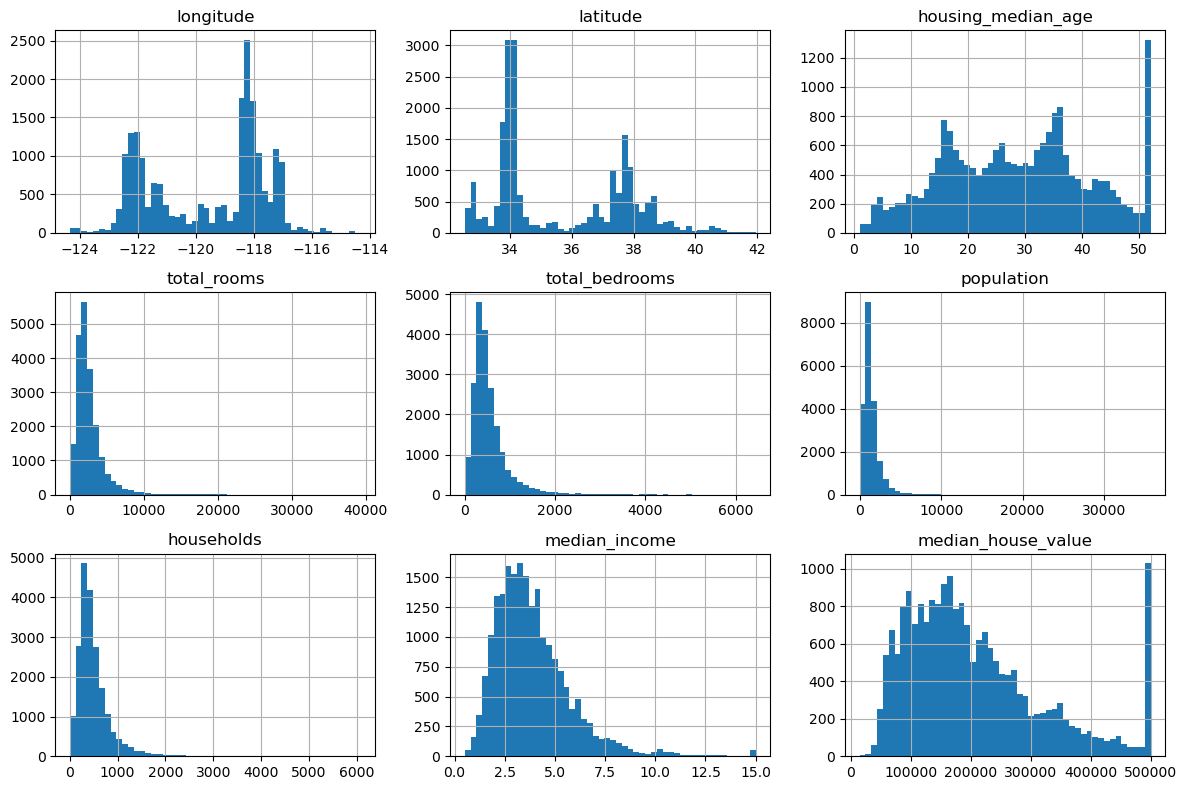

In [81]:
housing_df.hist(bins=50, figsize=(12, 8))
plt.tight_layout()
plt.show()

*Looking at the histograms we can see that:*
<i>

1. The "housing_median_age" is capped at 52 years (evident from the count shown along the y axis).
2. The "median_income" column has been scaled down by a factor of 10,000 USD (as noted earlier). The data also seems to be capped at about 0.5 for median income lower than 5,000 USD and at about 15 for median income above 150,000 USD.
3. The "median_house_value" seems to have been capped at 500,000 USD. Since this is the target variable we need to think extra carefully about what to do. Consult with the client to know what they think. If they need exact predictions for values beyond 500,000 USD, we could either drop the rows with median_house_value == 500_000 (but there's about 1000 such rows i.e, that's about 5% of the data) or, we can try to collect the exact values if possible. 
4. A common pattern among all the variables is that they have very different scales. Also most of the distributions are right skewed.
</i>

### <a id='toc4_1_'></a>[Create a test set](#toc0_)

It may seem too early to create a test set. It's very tempting to first dig through all the data and see if we can find any potential relation among the variables or if there are any patterns at all. But doing this can lead to overfitting of the model on the training and test set instead of generalizing on unseen data points. 

To avoid this we separate out a test set now. Also if the dataset is very large and hard to work with we can also sample out an *exploration set* for further inspection.

There are a lot of ways in which we can sample our test set from the whole dataset such as, simple random sampling, stratified random sampling, convenience sampling etc. 

To know more about sampling methods refer to - [Sampling (theory)](../Statistics/Theory/07_Sampling.md) and [Sampling in Python (notebook)](../Statistics/Sampling_and_Hypothesis_Testing/01_Sampling.ipynb).

#### <a id='toc4_1_1_'></a>[*Simple random sampling*](#toc0_)

If the dataset is large enough, and there are no subgroups in any of the variables that needs to be proportionately represented, we can use *simple random sampling*. 

1. We can use the `np.random.default_rng(seed).permutation(len(df)*test_set_ratio)` to generate a list of random indices which can then be used with `df.iloc[~idx]` or, `df.iloc[idx]` to generate the training and test set. 
2. We can also use the `df.sample(frac, random_state)` function to generate a test set and then use `df.iloc[~test_set.index]` to create the training set.
3. We can also use the `sklearn.model_selection.train_test_split(df, test_size, random_state)` function which will do this (i.e, generate the training and test set) in only one single line.

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
housing_train_set, housing_test_set = train_test_split(
    housing_df, test_size=0.2, random_state=42
)

#### <a id='toc4_1_2_'></a>[*Stratified random sampling*](#toc0_)

If the dataset is not large enough and you are concerned about **sampling bias** or, there are subgroups in a variable which needs to be proportionately represented in the test set, we can use *stratified random sampling.*

1. We first need to identify the subgroups. For categorical data it is easy to identify these subgroups. For numerical data we would need to create a new categorical column. The `pd.cut()` method is a very useful method for creating categorical representatives of a numeric column.
2. Again, we can go through the long route by using `.groupby().sample()` or we can just use `sklearn.model_selection.train_test_split(df, test_size, random_state, stratify=df.cat_col)` to create a single stratified random train and test set.

*Let's say we've been told that the median income is a very important attribute to predict median housing prices. You may want to ensure that the test set is representative of the various categories of incomes in the whole
dataset.*

The problem is that, the "median_income" column is a numeric column and there are no categorical column that represents different categories for median income. So we would have to create the categorical representations ourselves.

`Note:` It is important to have a sufficient number of instances in your dataset for each stratum, or else the estimate of a stratum’s importance may be biased. This means that you should not have too many strata, and each stratum should be large enough. 

Let's look closely at the distribution of the *"median_income"* column.

In [84]:
import numpy as np

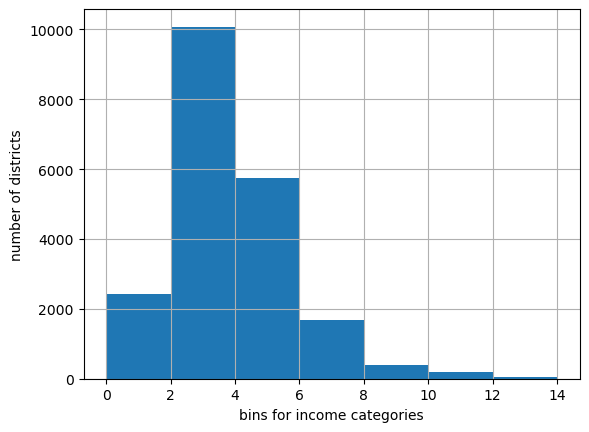

In [85]:
ax = housing_df.median_income.hist(bins=np.arange(0, 15, 2))
ax.set(xlabel="bins for income categories", ylabel="number of districts")
plt.show()

Playing around with the *"bins"* argument, we think we should create 4 categories - {1: 0-2, 2: 2-4, 3: 4-6, 4:6+}. We use ordinal numbers as categories since the bins are actually ordinal in nature.

In [86]:
housing_df["median_income_cat"] = pd.cut(
    housing_df["median_income"], bins=[0, 2, 4, 6, np.inf], labels=[1, 2, 3, 4]
)

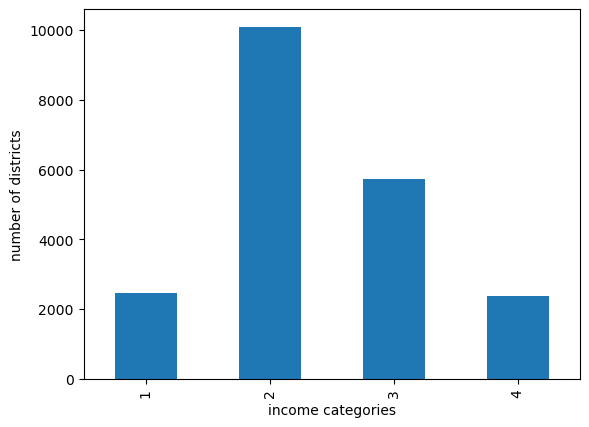

In [87]:
# since these are discrete data we use a bar plot to visualize them
ax = housing_df.median_income_cat.value_counts().sort_index().plot.bar()
ax.set(xlabel="income categories", ylabel="number of districts")
plt.show()

In [88]:
housing_strat_train_set, housing_strat_test_set = train_test_split(
    housing_df, test_size=0.2, random_state=42, stratify=housing_df.median_income_cat
)

We can verify that the categories of the *"median_income_cat"* column are equally represented in both the train and test set similar to how the categories are represented in the whole dataset.

In [20]:
strat_rep = (
    pd.DataFrame(housing_df.median_income_cat.value_counts(normalize=True))
    .sort_index()
    .rename(columns={"proportion": "whole_dataset_rep"})
)
strat_rep = strat_rep.assign(
    train_set_rep=strat_train_set.median_income_cat.value_counts(
        normalize=True
    ).sort_index(),
    test_set_rep=strat_test_set.median_income_cat.value_counts(
        normalize=True
    ).sort_index(),
)

strat_rep

,whole_dataset_rep,train_set_rep,test_set_rep
median_income_cat,,,
1,0.119041,0.119004,0.119186
2,0.489147,0.489159,0.489099
3,0.277374,0.277374,0.277374
4,0.114438,0.114462,0.114341


In [21]:
# we won't be needing the "median_income_cat" column anymore so we can just drop it
housing_df = housing_df.drop(columns="median_income_cat")

## <a id='toc5_'></a>[Explore and visualize the data to gain insights](#toc0_)

*Make sure that you have put the test set aside and you are only exploring the training set. Also, if the training set is very large, you may want to sample out an exploration set to make manipulations easy and fast during the exploration phase. In this case, the training set is quite small, so you can just work directly on the full set.*

*Also, Since you’re going to experiment with various transformations (on the full training set), you should make a copy of the original so you can revert to it afterwards.*

In [22]:
housing_exp = strat_train_set.copy()

In [23]:
housing_exp.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_cat
3012,-117.69,33.55,3.0,1618.0,266.0,710.0,246.0,6.0743,274300.0,<1H OCEAN,4
16951,-118.29,33.88,32.0,2307.0,493.0,1754.0,528.0,4.3170,232800.0,<1H OCEAN,3
14747,-117.64,34.05,32.0,1129.0,251.0,1378.0,268.0,3.0057,96900.0,INLAND,2
3846,-117.22,32.81,24.0,730.0,196.0,335.0,203.0,3.5078,362500.0,NEAR OCEAN,2
12574,-121.71,36.88,19.0,2528.0,554.0,2332.0,492.0,3.7766,177000.0,<1H OCEAN,2


**`Note:`** This round of exploration does not have to be absolutely thorough; the point is to start off on the right foot and quickly gain insights that will help you get a first reasonably good prototype. This is an iterative process: once you get a prototype
up and running, you can analyze its output to gain more insights and come back to this exploration step.

### <a id='toc5_1_'></a>[Visualizing geographical data](#toc0_)

- To plot geographical data using longitude and latitude values we can use a `scatterplot`.

In [24]:
import seaborn as sns

In [25]:
import warnings

warnings.filterwarnings("ignore")

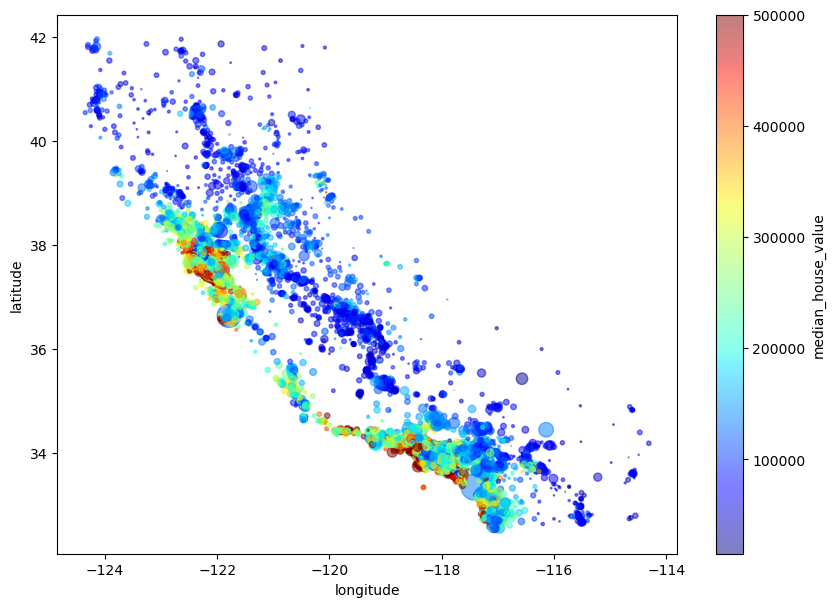

In [40]:
fig, ax = plt.subplots()
housing_exp.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    s=housing_exp["population"] / 100,
    c="median_house_value",
    cmap="jet",
    colorbar=True,
    legend=True,
    ax=ax,
    figsize=(10, 7),
    alpha=0.5,
)
plt.show()

House prices seems to be related to the population density and ocean proximity, although in Northern California the housing prices in coastal districts are not too high, so it is not a simple rule.

A clustering algorithm should be useful for detecting the main clusters and for adding new features that measure the proximity to the cluster centers.

### <a id='toc5_2_'></a>[Look for correlations](#toc0_)

Covariance is a measure of how much two random variables vary together.

The correlation is a dimensionless quantity and is denoted by $\rho_{xy}$. It is a normalized measure of covariance and is used for quantitative measurement of the statistical dependence between two random variables.


`Notes:`
- Covariance and correlation are only defined for numerical variables.
- **Covariance and correlation are only defined for linear relationships.**
- Correlation is always between -1 and 1.

**Correlation does not mean causation.**

See [this note](../Statistics/Theory/15_Covariance_and_correlation.md) for more details on covariance and correlation.

- The `df.corr()` method computes the pairwise correlation of columns, excluding NA/null values. By default, the Pearson correlation coefficient is computed.

In [30]:
housing_corr_matrix = housing_exp.select_dtypes("number").corr()

In [32]:
housing_corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687625
total_rooms           0.138470
housing_median_age    0.100729
households            0.068063
total_bedrooms        0.052905
population           -0.025029
longitude            -0.039394
latitude             -0.149820
Name: median_house_value, dtype: float64

The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation; for example, the median house value tends to go up when the median income goes up. When the coefficient is close to –1, it means that there is a strong negative correlation; you can see a small negative correlation between the latitude and the median house value (i.e., prices have a slight tendency to go down when you go north). Finally, coefficients close to 0 mean that there is no
linear correlation.

- Another way to check for correlation between numerical variables is to use a `pairplot` from the seaborn library or a `scatter_matrix` from the pandas library.

Since there are 11 numerical variables, the scatter matrix would have 11^2 = 121 plots. So we will only plot the scatter matrix for the variables that are most correlated with the target variable.

In [43]:
attributes = [
    "median_house_value",
    "median_income",
    "total_rooms",
    "housing_median_age",
    "latitude",
]

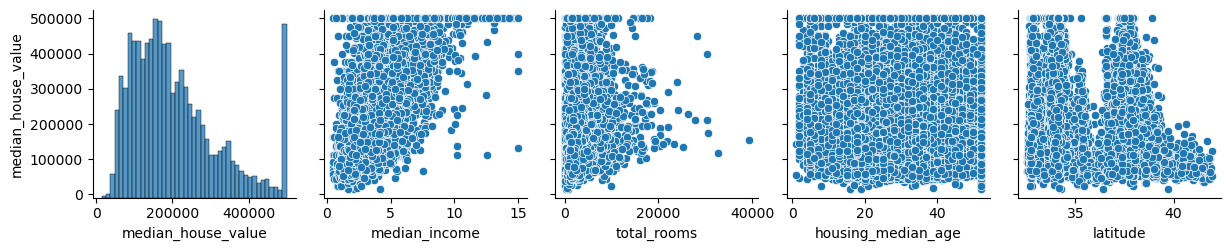

In [67]:
sns.pairplot(housing_exp[attributes], diag_kind="hist", y_vars="median_house_value")
plt.show()

In [52]:
# pd.plotting.scatter_matrix(housing_exp[attributes])

It looks like the most promising attribute to predict the median house value is the median income, so let’s zoom in on their correlation scatterplot.

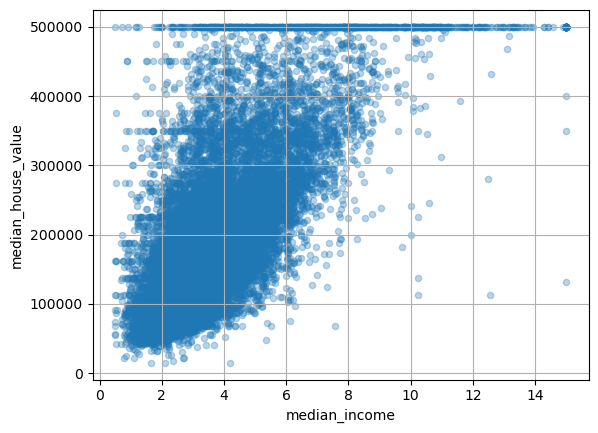

In [58]:
housing_exp.plot.scatter(
    x="median_income", y="median_house_value", alpha=0.3, grid=True
)
plt.show()

Looking at the scatterplot we can see that - 

1. There's a clear upward trend and the values are not too dispersed.
2. The price cap at 500,000 USD is clearly visible as a horizontal line at y = 500000. There are some other less obvious horizontal lines around 450,000 USD and 350,000 USD and perhaps one around 280,000 USD. We may want to try removing the corresponding districts to prevent our algorithms from learning to reproduce these data quirks.

**`Note:`** The correlation coefficient only measures linear correlations (i.e., as x goes up, y generally goes up/down). It may completely miss out on nonlinear relationships (e.g., as x approaches 0, y generally goes up). 

### <a id='toc5_3_'></a>[Experimenting with attribute combinations](#toc0_)

Try out various attribute combinations. For example, the total number of rooms in a district is not very useful if you don’t know how many households there are. What you really want is the number of rooms per household. Similarly, the total number of bedrooms by itself is not very useful: you probably want to compare it to the number of rooms. And the population per household also seems like an interesting attribute combination to look at. 

In [59]:
housing_exp["rooms_per_house"] = housing_exp["total_rooms"] / housing_exp["households"]
housing_exp["bedrooms_ratio"] = (
    housing_exp["total_bedrooms"] / housing_exp["total_rooms"]
)
housing_exp["people_per_house"] = housing_exp["population"] / housing_exp["households"]

Look at the correlation matrix again and see how much the new attributes are correlated with the target variable.

In [60]:
housing_exp.select_dtypes("number").corr()["median_house_value"].sort_values(
    ascending=False
)

median_house_value    1.000000
median_income         0.687625
rooms_per_house       0.149741
total_rooms           0.138470
housing_median_age    0.100729
households            0.068063
total_bedrooms        0.052905
people_per_house     -0.022009
population           -0.025029
longitude            -0.039394
latitude             -0.149820
bedrooms_ratio       -0.253359
Name: median_house_value, dtype: float64

The new *"bedrooms_ratio"* attribute is much more correlated with the median house value than the total number of rooms or bedrooms. Apparently houses with a lower bedroom/room ratio tend to be more expensive. The number of rooms per household is also more informative than the total number of rooms in a district — obviously the larger the houses, the more expensive they are.

## <a id='toc6_'></a>[Data preparation for ML algorithms](#toc0_)

**Main things to do in the Data Preprocessing Workflow:**

1. Features & Target Extraction: Splitting the Dataset into Feature Variables(X) & Target Variable(y).
2. Handling Missing Values: Data Imputation and Removal of Undesired Entries from the Dataset.
3. Encoding (Handling Categorical Variables): Converting Non-numerical Features & Target to Numerical Values.
4. Standardization: Transforming the Numerical Variables Such that the Mean is 0 and the Standard Deviation is 1.
5. Feature Engineering

**N.B.** You don't have to follow these steps in sequential order. In fact you shouldn't. Keep in mind that the Dataset and The Machine Learning Model of choice dictates what to do first. Sometimes you may even skip one or multiple steps based on the situation.

### <a id='toc6_1_'></a>[Feature & Target extraction](#toc0_)

One important thing to do when experimenting with data transformation operations is to write the transformation code in functions. This provides several benefits: 

1. This will allow you to reproduce these transformations easily, next time you get a fresh dataset.
2. These transformation functions can be applied to the new incoming data before feeding it to the model (in online learning).
3. This will allow you to try various transformations and see which combination of transformations works best.
4. You can gradually build a library of transformation functions that you can reuse in future projects.

In the data pre-processing pipeline, first, we need to separate the predictors and the labels, since we don’t necessarily want to apply the same transformations to the predictors and the target values.

In [93]:
# first revert back to a clean copy of the training set
housing_X = housing_strat_train_set.drop(
    columns="median_house_value"
)  # drop() returns a copy
housing_y = housing_strat_train_set["median_house_value"].copy()

### <a id='toc6_2_'></a>[Handling missing values](#toc0_)

For various reasons, many real world datasets contain missing values, often encoded as blanks, NaNs or other placeholders. Such datasets however are incompatible with scikit-learn estimators which assume that all values in an array are numerical, and that all have and hold meaning. A basic strategy to use incomplete datasets is to discard entire rows and/or columns containing missing values. However, this comes at the price of losing data which may be valuable (even though incomplete). A better strategy is to impute the missing values, i.e., to infer them from the known part of the data.

We can use the pandas `df.dropna(subset)` method to drop the rows with missing values, or, `df.drop(columns)` to drop the entire column with missing values, or, we can use the `df.fillna(value)` method to fill the missing values with a value of our choice. We can use the *mean, median, mode* or any other value that we think is appropriate.

But the problem with using `df.fillna()` is that we would have to store the calculated values somewhere and use them to fill the missing values in the validation/test set or in the new incoming data points. To avoid this problem we can use the `sklearn.impute` module. This module provides a set of functions to impute missing values. 

#### <a id='toc6_2_1_'></a>[*Univariate imputation*](#toc0_)

One type of imputation algorithm is univariate, which imputes values in the i-th feature dimension using only non-missing values in that feature dimension. The `sklearn.impute.SimpleImputer` class implements some basic univariate imputation strategies. The `SimpleImputer(missing_values, strategy, fill_value, keep_empty_features)` object can be used for imputing missing values with a provided constant value, or using the statistics (mean, median or most frequent) of each column in which the missing values are located. This class also allows for different missing values encodings. The `SimpleImputer` class also ***supports categorical data represented as string values or pandas categoricals when using the 'most_frequent' or 'constant' strategy.***

In [96]:
from sklearn.impute import SimpleImputer

In [97]:
# create a SimpleImputer object instance
imputer = SimpleImputer(strategy="median", keep_empty_features=True)

**`Note:`**
1. The `SimpleImputer` is used to apply a common imputation strategy to all the columns in a dataset. If you need to use different imputation strategy for different columns then you can use the `ColumnTransformer` which is designed for these use-cases. See the [documentation](https://scikit-learn.org/stable/modules/compose.html#column-transformer) for more details.

2. By default, the scikit-learn imputers will drop fully empty features, i.e. columns containing only missing values. While such features will not help in predictive setting, dropping the columns will change the shape of X (i.e, the feature matrix) which could be problematic when using imputers in a more complex machine-learning pipeline. The parameter `keep_empty_features` offers the option to keep the empty features by imputing with a constant values. In most of the cases, this constant value is `zero`.

In [98]:
# the strategy = "median" can only be used with numerical data
housing_X_num = housing_X.select_dtypes("number")

In [100]:
# now we can fit the imputer instance to the training data using the fit() method
imputer.fit(housing_X_num)

SimpleImputer(keep_empty_features=True, strategy='median')

The imputer has simply computed the median of each attribute and stored the result in its `statistics_` instance variable. Only the *total_bedrooms* attribute had missing values, but we cannot be sure that there won’t be any missing values in new data after the system goes live, so it is safer to apply the imputer to all the numerical attributes.

In [105]:
print(imputer.statistics_)
print(housing_X_num.median().values)

[-118.49      34.25      29.      2118.       433.      1165.
  408.         3.52955]
[-118.49      34.25      29.      2118.       433.      1165.
  408.         3.52955]


In [109]:
# now we can use this “trained” imputers' "transform" method to transform the training set by replacing
# missing values with the learned medians
housing_X_num = imputer.transform(housing_X_num)

**`Note:`** Scikit-Learn transformers output NumPy arrays (or sometimes SciPy sparse matrices) even when they are fed Pandas DataFrames as input. But you can easily convert this array to a pandas dataframe using the `pd.DataFrame()` method.

In [112]:
# housing_X_num

In [114]:
pd.DataFrame(
    housing_X_num,
    columns=housing_X.select_dtypes("number").columns,
    index=housing_X.index,
)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
3012,-117.69,33.55,3.0,1618.0,266.0,710.0,246.0,6.0743
16951,-118.29,33.88,32.0,2307.0,493.0,1754.0,528.0,4.3170
14747,-117.64,34.05,32.0,1129.0,251.0,1378.0,268.0,3.0057
3846,-117.22,32.81,24.0,730.0,196.0,335.0,203.0,3.5078
12574,-121.71,36.88,19.0,2528.0,554.0,2332.0,492.0,3.7766
...,...,...,...,...,...,...,...,...
12798,-121.97,37.29,25.0,4096.0,743.0,2027.0,741.0,5.3294
7300,-118.14,33.97,36.0,1407.0,385.0,1763.0,350.0,2.6364
11551,-122.32,37.94,46.0,1901.0,295.0,833.0,352.0,5.5196
2726,-121.45,41.04,33.0,2029.0,378.0,936.0,343.0,2.6700


#### <a id='toc6_2_2_'></a>[*Multivariate imputation*](#toc0_)

By contrast, multivariate imputation algorithms use the entire set of available feature dimensions to estimate the missing values. An implementation is available as the `sklearn.impute.IterativeImputer` class.

IterativeImputer trains a regression model per feature to predict the missing values based on all the other available
features. It then trains the model again on the updated data, and repeats the process several times, improving the models and the replacement values at each iteration. See the [user guide](https://scikit-learn.org/stable/modules/impute.html#impute) for more details.


#### <a id='toc6_2_3_'></a>[*Nearest neighbors imputation*](#toc0_)

`KNNImputer` class replaces each missing value with the mean of the k-nearest neighbors’ values for that feature. The distance is based on all the available features. See the [user guide](https://scikit-learn.org/stable/modules/impute.html#impute) for more details.